# Assignment on Classification

## Q.1. Read the dataset into Python environment 

In [485]:
# importing all essential libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings

In [486]:
# loading the dataset from local folder
data=pd.read_excel(r"C:\Users\Amby\Downloads\iris-new.xls")

### Checking the basic details about the dataset

In [487]:
data.head()            # displays all columns and first five rows

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [488]:
data.shape      # displays total no: of rows and columns in the dataset

(150, 5)

In [489]:
data.Classification.value_counts()  #displays counts of each unique value in this column

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [490]:
data.info()     # displays brief information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


 ## Q.2. Do the necessary preprocessing steps

### Missing Value Handling

In [491]:
data.isna().sum()  # checking for missing values

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

 #### The dataset have missing values in 'SW' and 'PL'

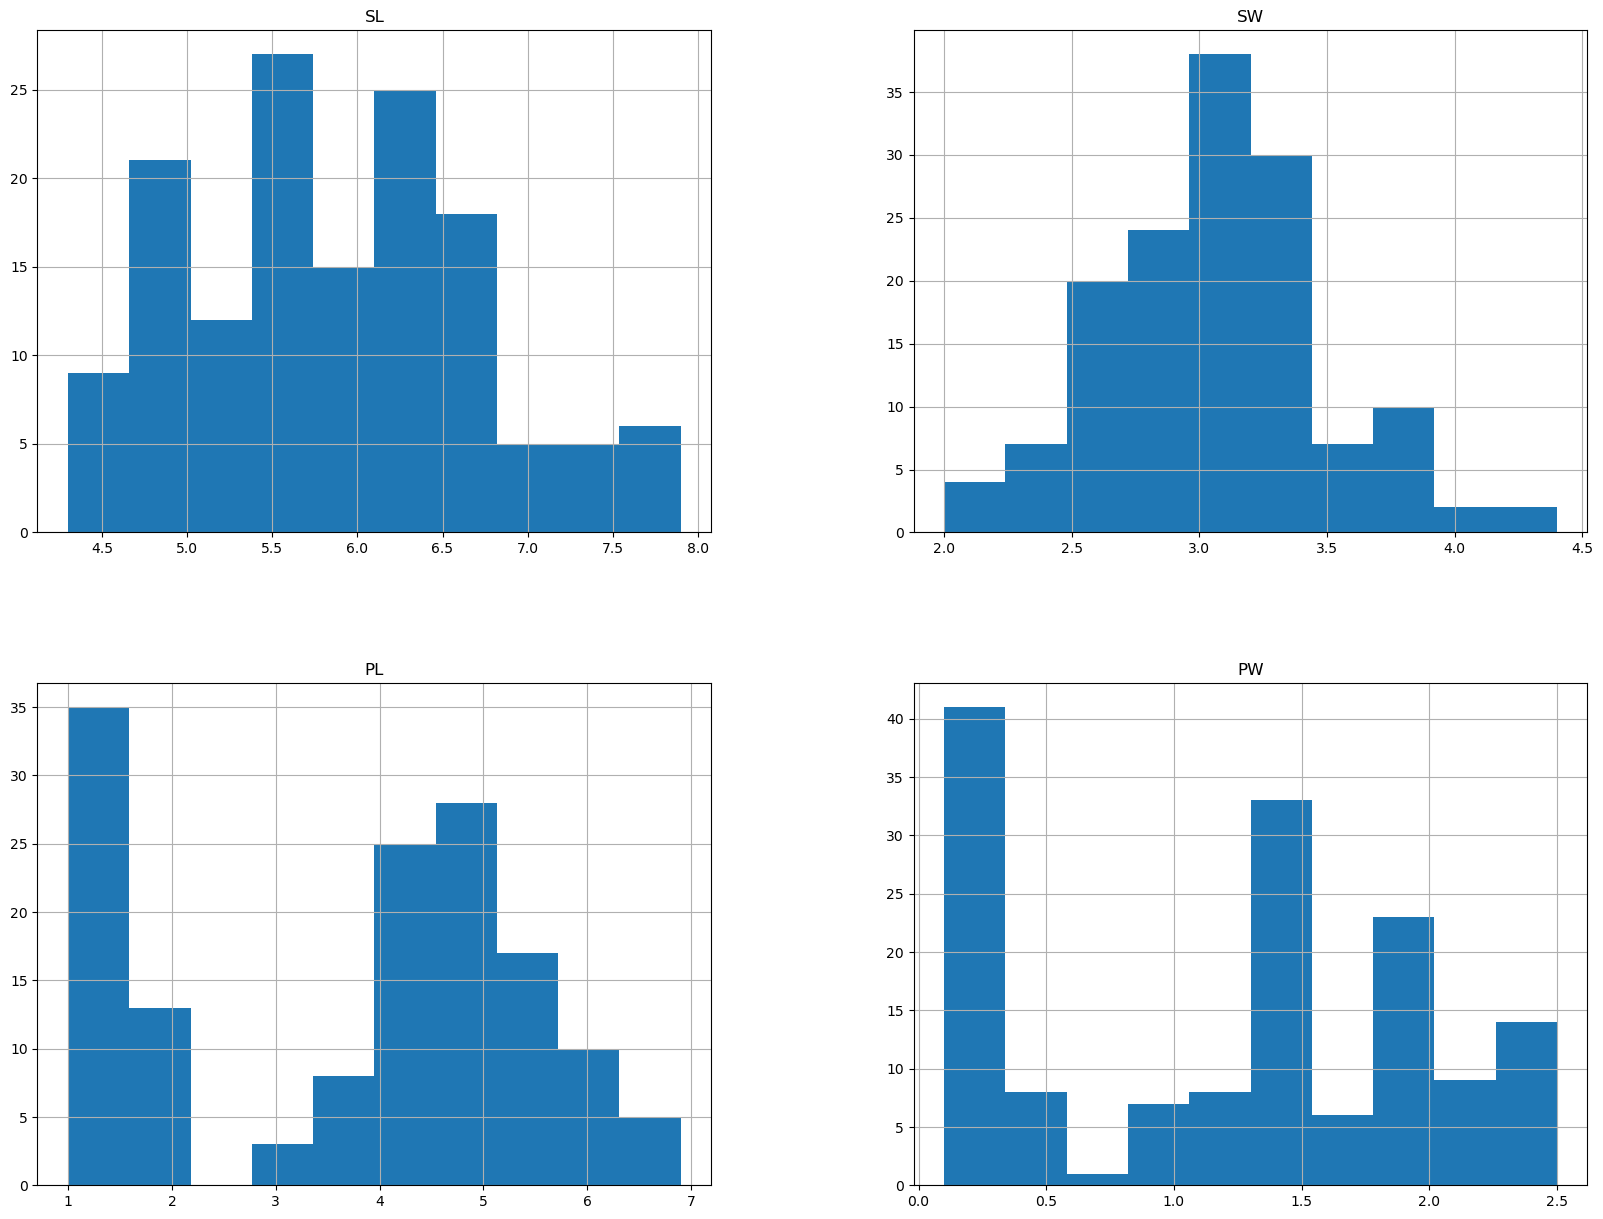

In [492]:
fgraph=data.select_dtypes(include=['float'])  # plotting histograms for all continuous values 
fgraph.hist(figsize=(20,15))
plt.show()

 #### The above histogram shows skewness in the distribution, so the null values should be filled with the median or mode. 

In [493]:
for col in ['SL','SW','PL']:   # filling the null values in the dataset with median value.       
    data[col]=data[col].fillna(data[col].median())

In [494]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### Now the dataset has no null values.

### Outlier Handling

In [495]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

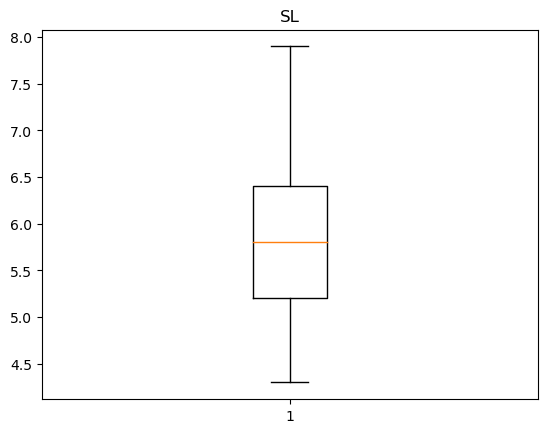

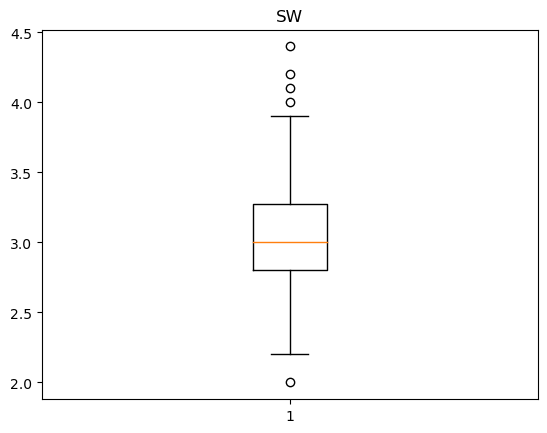

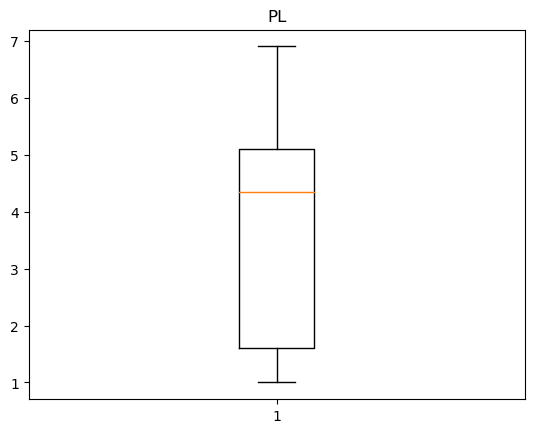

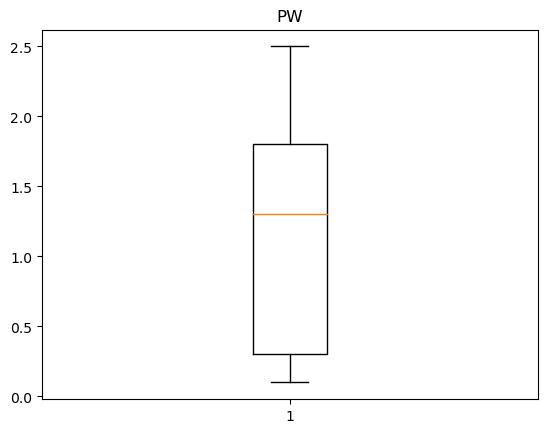

In [496]:
num_data=['SL', 'SW', 'PL', 'PW'] # plotting boxplots for continuous features in the dataset
for i in num_data:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

#### #### *From the above boxplots, we can see that there is outliers in the 'SW ' feature. Since, it may harm the dataset if we remove the outlier, we can perform flooring and capping technique to handle the outliers.  


In [497]:
# finding Q1,Q2,Q3 percentiles 
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
warnings.filterwarnings('ignore')

In [498]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [499]:
# finding IQR
IQR=Q3-Q1
print(IQR)

0.4500000000000002


In [500]:
# finding upper limit and lower limit values
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR
print(up_lim)
print(low_lim)

3.9250000000000003
2.1249999999999996


In [501]:
# finding the outlier values
outliers=[]
for x in data['SW']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)
outliers        
     

[4.0, 4.4, 4.1, 4.2, 2.0]

In [502]:
# applying flooring and mapping technique 
data['SW']=np.where(data['SW']>up_lim,up_lim,np.where(data['SW']<low_lim,low_lim,data['SW']))

In [503]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: >

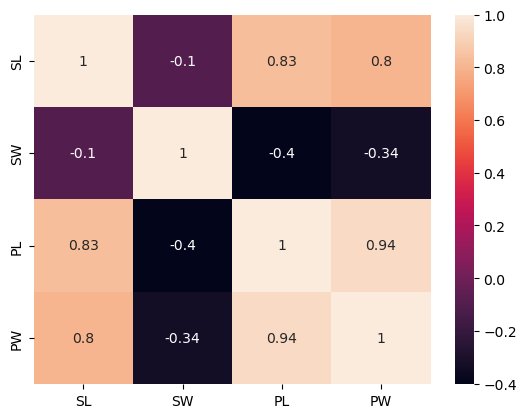

In [504]:
sns.heatmap(data.corr(),annot=True)

#### Here, the correlation coefficient between and PL and PW is 0.96 which is much closer to one, which shows a strong positive relationship between them.

## Label Encoding

In [505]:
le=LabelEncoder()    # Label encoding the Classification feature.
data['Classification']=le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### After Label Encoding, the categorical data which are, 'Iris-setosa','Iris-versicolor' and 'Iris-virginica' in the Classification column encoded to values 0,1, and 2 respectively.

## Q.3.Find out which classification model gives the best result.

In [506]:
# Splitting into Feature and Target
X=data.drop(['Classification'],axis=1) # target or dependent variable
y=data['Classification']   #predictor variable or independent variable

In [568]:
#Splitting the data into training and testing tests
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Implementing Logistic Regression Model

In [569]:
logit_model=LogisticRegression() #creating an instance of Logistic Regression class 
logit_model.fit(X_train,y_train) # fitting a Logistic Regression model to the training data
y_pred_lr=logit_model.predict(X_test) # predicting the target variable values

### Checking for Evaluation Metrics

In [570]:
print("Precision score: ",precision_score(y_test,y_pred_lr,average='micro'))
print("recall :",recall_score(y_test,y_pred_lr,average='micro'))
print("f1 :",f1_score(y_test,y_pred_lr,average='micro'))
print("accuracy :",accuracy_score(y_test,y_pred_lr))

Precision score:  0.9736842105263158
recall : 0.9736842105263158
f1 : 0.9736842105263158
accuracy : 0.9736842105263158


In [571]:
confusion_matrix(y_test,y_pred_lr)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

## Conducting Standard Scaling to check whether it makes any change in the performance of the model after scaling.

### Standard Scaling

In [572]:
X=data.drop(['Classification'],axis=1)
std=StandardScaler()
X=std.fit_transform(X)

In [573]:
X=pd.DataFrame(X,columns=['SL','SW','PL','PW'])


In [574]:
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred_lr=logit_model.predict(X_test)

In [575]:
print("Precision score: ",precision_score(y_test,y_pred_lr,average='macro'))
print("recall :",recall_score(y_test,y_pred_lr,average='macro'))
print("f1 :",f1_score(y_test,y_pred_lr,average='macro'))
print("accuracy :",accuracy_score(y_test,y_pred_lr))

Precision score:  0.9722222222222222
recall : 0.9777777777777779
f1 : 0.9740129935032483
accuracy : 0.9736842105263158


In [557]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

#### By checking the outputs of the Logistic regression model  before scaling and after scaling, we can see that there is a minor difference in the outputs. 

##  Implementing k-Nearest Neighbor Model

In [558]:
X=data.drop(['Classification'],axis=1)
from sklearn.neighbors import KNeighborsClassifier
metric=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

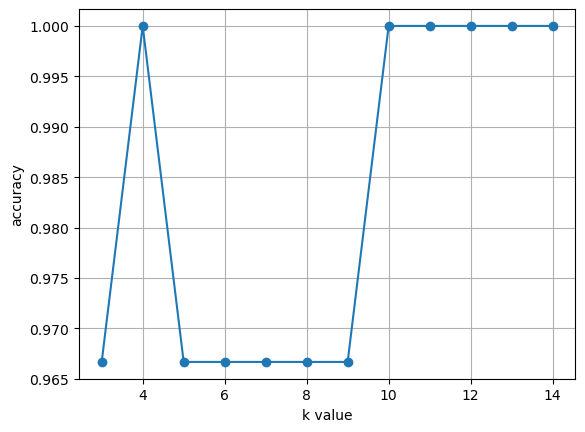

In [559]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

*The above set of codes calculate and store  the accuracy scores for different values of 'k' in the metric list.

*After the loop finishes,the accuracy scores  are plotted against the no: of neighbors, x-axis represents the no: of neighbors and y-axis represents the accuracy scores.

*The resulting plot will show how the accuracy of the k-NN model varies with the different values of 'k', allowing us to determine the optimal no: of neighbors of this model.

In [577]:
# creating a k-NN classifier with n_neighbors=12 
classifier=KNeighborsClassifier(n_neighbors=12,metric='minkowski',p=2) 
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)


In [561]:
# Evaluating the k-NN modelby finding the metrics
print("Precision score: ",precision_score(y_test,y_pred_knn,average='micro'))
print("recall :",recall_score(y_test,y_pred_knn,average='micro'))
print("f1 :",f1_score(y_test,y_pred_knn,average='micro'))
print("accuracy :",accuracy_score(y_test,y_pred_knn))

Precision score:  1.0
recall : 1.0
f1 : 1.0
accuracy : 1.0


In [578]:
confusion_matrix(y_test,y_pred_knn)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

###  Based on the comparison between k-NN and Logistic regression models, the k-NN model appears to perform better than the logistic model on the Iris dataset. It achieved higher accuracy, precision, recall and F1 score indicating better overall predictive performance for this multiclass classification.